##### Import Required Libraries

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_folder = kagglehub.dataset_download("benroshan/factors-affecting-campus-placement")

csv_path = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.csv')][0]

df = pd.read_csv(csv_path)

c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Initial Data Exploration


In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
df.shape

(215, 15)

In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


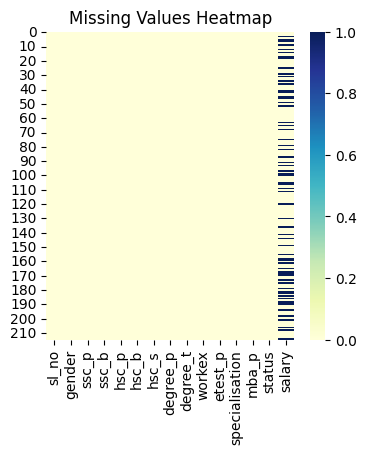

In [7]:
plt.figure(figsize = (4,4))
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop(columns= ['sl_no'])

##### EDA

In [10]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

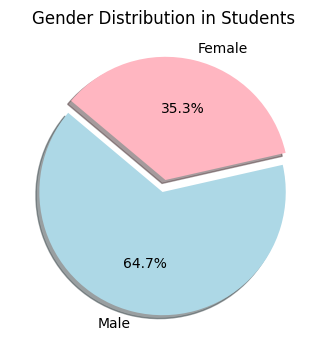

In [11]:
plt.figure(figsize = (4,4))
df["gender"].value_counts().plot(kind = 'pie' , title= "Gender Distribution in Students" , autopct='%1.1f%%',
                                  figsize= (4,4) , shadow= True , xlabel= "" , ylabel= "" , 
                                  colors= ['lightblue' , 'lightpink'], startangle= 140 , explode= [0.05 , 0.05] , labels = ["Male" , "Female"]
                                 )
plt.show()

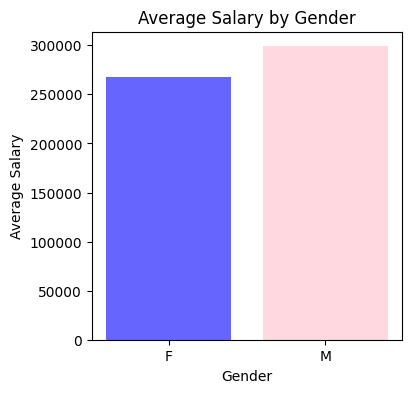

In [12]:
x = df.groupby("gender")["salary"].mean().reset_index()
plt.figure(figsize = (4,4))
fig = plt.bar(x = "gender", height = "salary", data = x, color = ['blue', 'pink'], alpha = 0.6)
xlabel = plt.xlabel("Gender")
ylabel = plt.ylabel("Average Salary")
plt.title("Average Salary by Gender")
plt.show()

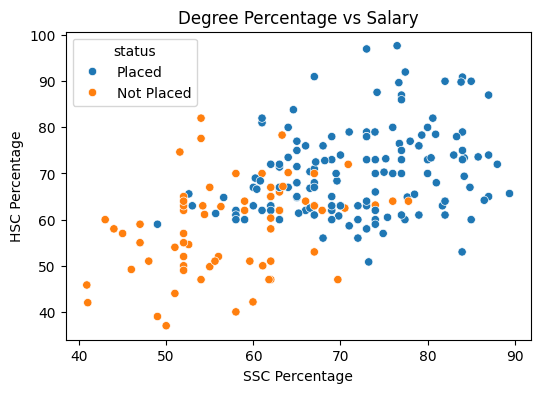

In [13]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'ssc_p', y = 'hsc_p', data = df, hue = 'status' )
plt.title("Degree Percentage vs Salary")
plt.xlabel("SSC Percentage")
plt.ylabel("HSC Percentage")
plt.show(block= True)

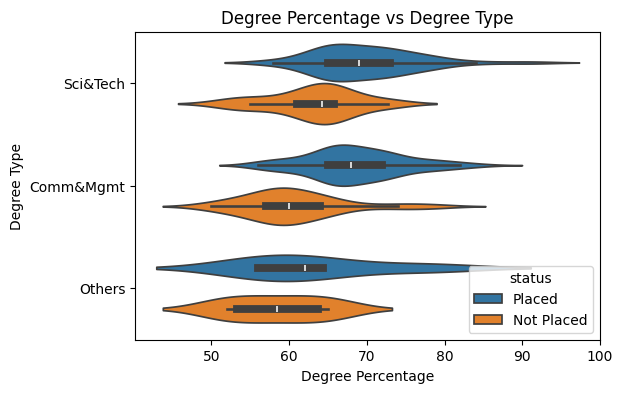

In [36]:
plt.figure(figsize = (6,4))
sns.violinplot(x = 'degree_p', y = 'degree_t', data = df, hue = 'status' )
plt.title("Degree Percentage vs Degree Type")
plt.xlabel("Degree Percentage")
plt.ylabel("Degree Type")
plt.show()


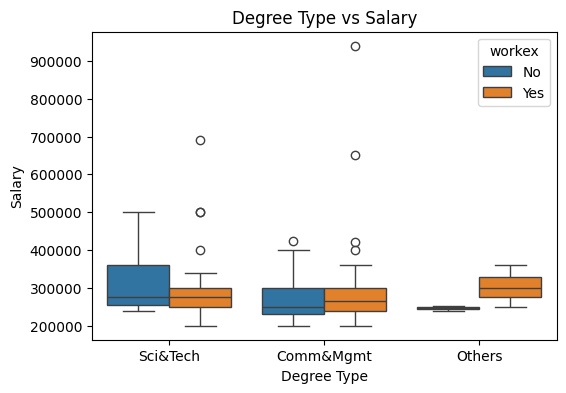

In [15]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'degree_t', y = 'salary', data = df , hue = 'workex')
plt.title("Degree Type vs Salary")
plt.xlabel("Degree Type")
plt.ylabel("Salary")
plt.show()


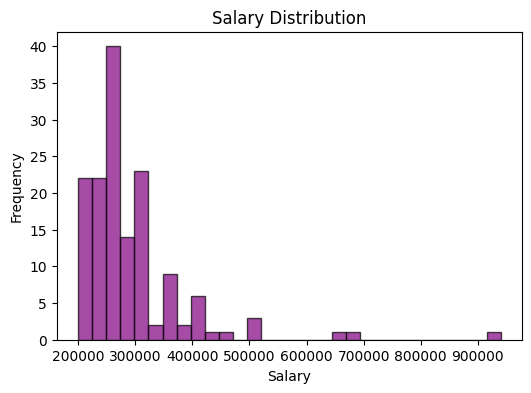

In [ ]:
plt.figure(figsize = (6,4))
plt.hist(df['salary'] , bins= 30, color = 'purple', alpha = 0.7 , edgecolor = 'black' )
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

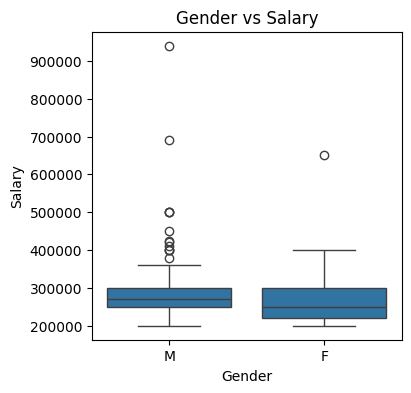

In [54]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'gender', y = 'salary', data = df)
plt.title("Gender vs Salary")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.show()


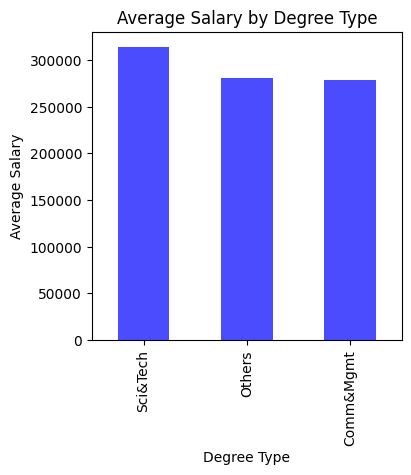

In [45]:
df.groupby('degree_t')['salary'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(4,4), color='blue', alpha=0.7)
plt.title("Average Salary by Degree Type")
plt.xlabel("Degree Type")
plt.ylabel("Average Salary")
plt.show()


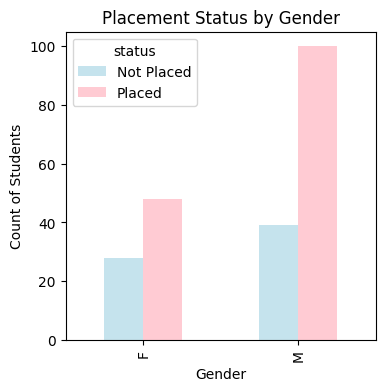

In [59]:
df["status"].groupby(df["gender"]).value_counts().unstack().plot(kind='bar', figsize=(4,4), color=['lightblue', 'lightpink'], alpha=0.7)
plt.title("Placement Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Students")
plt.show()


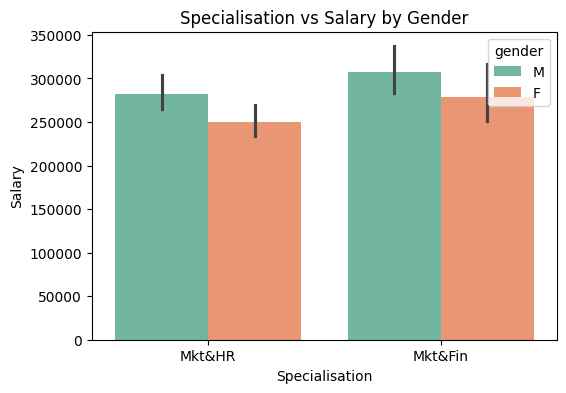

In [69]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'specialisation', y = "salary", hue = 'gender', data = df, palette = 'Set2')
plt.title("Specialisation vs Salary by Gender")
plt.xlabel("Specialisation")
plt.ylabel("Salary")
plt.show()

In [70]:
df.groupby(['specialisation', 'gender'])['salary'].mean().reset_index()

,specialisation,gender,salary
0,Mkt&Fin,F,279285.714286
1,Mkt&Fin,M,307029.850746
2,Mkt&HR,F,250500.000000
3,Mkt&HR,M,282424.242424
